# Fetching and Visualizing Data

In [34]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys

np.set_printoptions(suppress=True,linewidth=sys.maxsize,threshold=sys.maxsize)

In [4]:
mnist = fetch_openml('mnist_784', as_frame = False)

In [5]:
X, y = mnist.data, mnist.target

In [45]:
def plot_digit(image_data):
    image = image_data.reshape(28,28)
    plt.imshow(image, cmap='binary')
    plt.axis('off')

plt.show()

# Exercise 1

### Using KNeighborsClassifier to train data

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score

In [8]:
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

In [9]:
knn_clf = KNeighborsClassifier()

In [10]:
cross_val_score(knn_clf, X_train, y_train, cv = 2)

array([0.96336667, 0.96393333])

In [11]:
knn_clf.fit(X_train, y_train)
knn_clf.score(X_test, y_test)

0.9688

### Using GridSearchCV to find good hyperparameters

In [12]:
from sklearn.model_selection import GridSearchCV

In [13]:
params = [{'weights':['uniform','distance'], 'n_neighbors':[3,4,5,6]}]

In [14]:
knn_clf = KNeighborsClassifier()
grid = GridSearchCV(knn_clf, param_grid= params, cv = 5)

In [15]:
grid.fit(X_train[:10000],y_train[:10000])

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 4, 5, 6],
                          'weights': ['uniform', 'distance']}])

In [16]:
knn_clf = grid.best_estimator_
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [17]:
knn_clf.score(X_test, y_test)

0.9714

# Exercise 2

In [46]:
from scipy.ndimage import shift # type: ignore

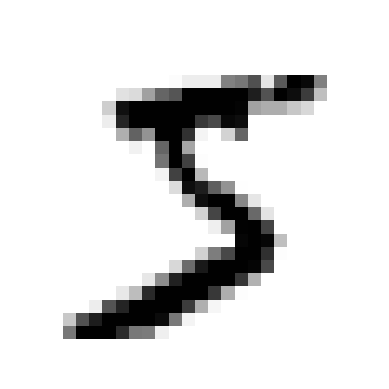

In [47]:
plot_digit(X_train[0])

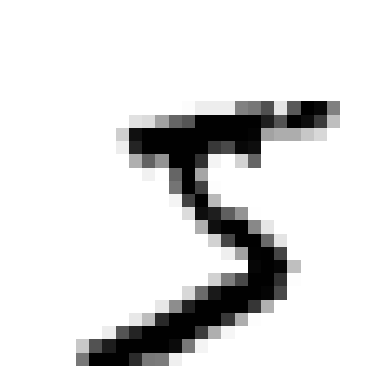

In [85]:
data = X_train[0]
image = data.reshape(28,28)
image_shift = shift(image, [2,1], cval=0) # 2 pixels down and 1 pixel right
data_shift = image_shift.reshape(-1)
plot_digit(data_shift)

In [ ]:
X_exp = [x for x in X_train]
y_exp = [y for y in y_train]
count = 0

for data, label in zip(X_exp, y_exp):
    count = count+1

    image = data.reshape(28,28)

    data_up = shift(image, [1,0], cval = 0).reshape(-1)
    data_down = shift(image, [-1,0], cval = 0).reshape(-1)
    data_right = shift(image, [0,1], cval = 0).reshape(-1)
    data_left = shift(image, [0,-1], cval = 0).reshape(-1)

    for new_data in [data_up, data_down, data_right, data_left]:
        X_exp.append(new_data)
        y_exp.append(label)

    if (count % 1000 == 0): print(count)

Now shuffle the expanded data set and apply the best estimator we found earlier. Now train the dataset on X_exp and y_exp and then find the scores from the X_test and y_test dataset. Voila!